In [95]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from  sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics 


In [96]:

house_df=pd.read_csv(r"C:\Users\Asus\Desktop\GoMyCode\ia\data\kc_house_data.csv", sep =',')
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# cleaning and preprocessing the dataframe 


In [97]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [98]:
house_df = house_df.drop(['date'],axis=1)
house_df=house_df.drop(['id'], axis=1)


## correlation between variables 

Text(0, 0.5, 'price')

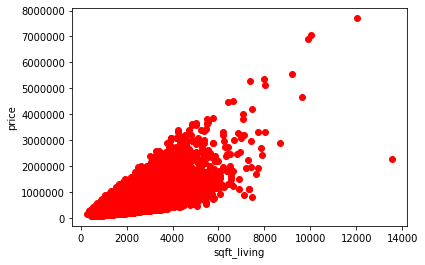

In [99]:

x=house_df["sqft_living"].values
y=house_df["price"].values
plt.scatter(x,y, color ="r") 
plt.xlabel("sqft_living")
plt.ylabel('price')

Text(0, 0.5, 'price')

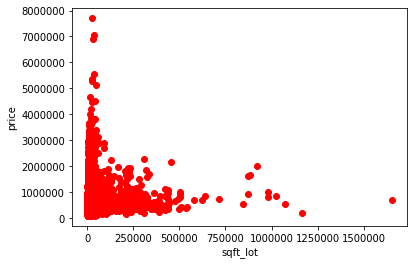

In [100]:
x=house_df["sqft_lot"].values
y=house_df["price"].values
plt.scatter(x,y, color ="r") 
plt.xlabel("sqft_lot")
plt.ylabel('price')


Text(0, 0.5, 'price')

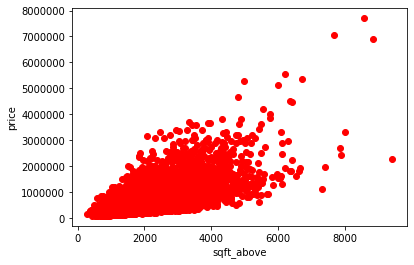

In [101]:
x=house_df["sqft_above"].values
y=house_df["price"].values
plt.scatter(x,y, color ="r") 
plt.xlabel("sqft_above")
plt.ylabel('price')

Text(0, 0.5, 'price')

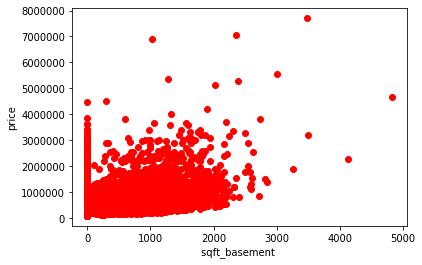

In [102]:
x=house_df["sqft_basement"].values
y=house_df["price"].values
plt.scatter(x,y, color ="r") 
plt.xlabel("sqft_basement ")
plt.ylabel('price')

Text(0, 0.5, 'price')

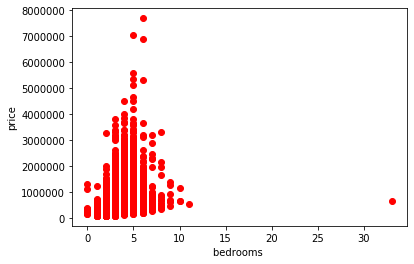

In [103]:
x=house_df["bedrooms"].values
y=house_df["price"].values
plt.scatter(x,y, color ="r") 
plt.xlabel("bedrooms ")
plt.ylabel('price')

In [104]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 18 , 18 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

    corr, 

    cmap = cmap,

    square=True, 

    cbar_kws={ 'shrink' : .9 }, 

    ax=ax, 

    annot = True, 

    annot_kws = { 'fontsize' : 12 }

    )

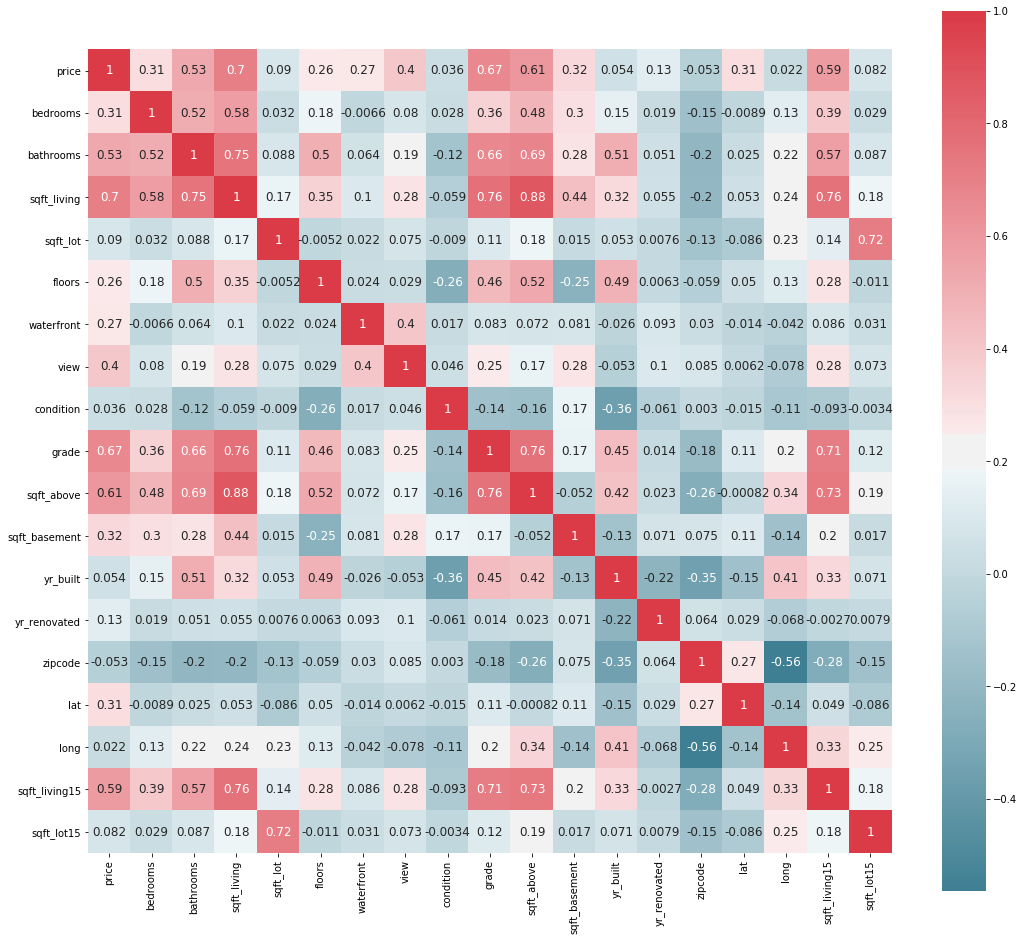

In [105]:
plot_correlation_map(house_df)

sqft_living15 and sqft_living are strongly correlated and  almost the same 
and sqft_lot15 and sqft_lot are also strongly correlated and almost the same 
the zip code correlation with the price is too small
so we can drop them

In [106]:
house_df = house_df.drop(["sqft_living15"], axis=1)
house_df=house_df.drop(["sqft_lot15"], axis =1)
house_df=house_df.drop(["zipcode"], axis=1)

# feature selection 

the most important features strongly correlated with the price of the house are :
    -the sqft_living
    -the sqft_above
    - the grade 
    - the view
    - the bedrooms
    - the bathrooms
    - the sqft_basement
    - the lat
    -the floors
    -the waterfront

# linear regression 

## x is sqft_living 

In [107]:
X=house_df["sqft_living"].values [:,np.newaxis]
y=house_df["price"].values
y=np.log(y)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3, random_state=40)
model= LinearRegression()
model.fit(X_train,y_train)
predicted=model.predict(X_test)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, predicted))
Rsquared=metrics.r2_score(y_test,predicted)
a=model.coef_
b=model.intercept_
dict_rest={
   "RMSE": RMSE,
    "Rsquared":Rsquared,
    "coef" : a,
    "intercept":b
}
dict_rest

{'RMSE': 0.37507668016201706,
 'Rsquared': 0.48977112597103756,
 'coef': array([0.00039807]),
 'intercept': 12.217472879388149}

<function matplotlib.pyplot.show(*args, **kw)>

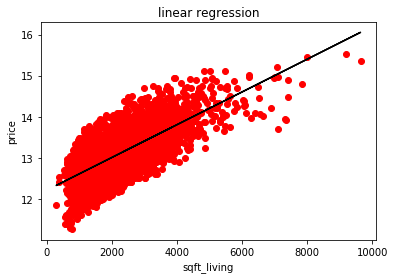

In [108]:
plt.scatter(X_test,y_test, color='r')
plt.title("linear regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(X_test,model.predict(X_test), color='k')
plt.show

In [109]:
## x is sqft_above

In [110]:
X=house_df["sqft_above"].values [:,np.newaxis]
y=house_df["price"].values
y=np.log(y)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.7, random_state=40)
model= LinearRegression()
model.fit(X_train,y_train)
predicted=model.predict(X_test)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, predicted))
Rsquared=metrics.r2_score(y_test,predicted)
a=model.coef_
b=model.intercept_
dict_rest={
   "RMSE": RMSE,
    "Rsquared":Rsquared,
    "coef" : a,
    "intercept":b
}
dict_rest

{'RMSE': 0.4199396042279337,
 'Rsquared': 0.3635087991934909,
 'coef': array([0.00038465]),
 'intercept': 12.361213407323476}

<function matplotlib.pyplot.show(*args, **kw)>

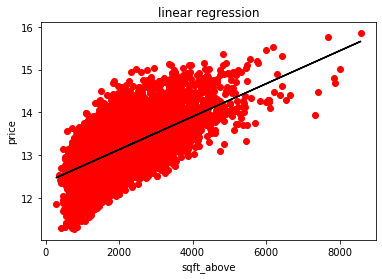

In [111]:
plt.scatter(X_test,y_test, color='r')
plt.title("linear regression")
plt.ylabel("price")
plt.xlabel("sqft_above")
plt.plot(X_test,model.predict(X_test), color='k')
plt.show

In [112]:
## x is the grade

In [113]:
X=house_df["grade"].values [:,np.newaxis]
y=house_df["price"].values
y=np.log(y)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.5, random_state=90)
model= LinearRegression()
model.fit(X_train,y_train)
predicted=model.predict(X_test)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, predicted))
Rsquared=metrics.r2_score(y_test,predicted)
a=model.coef_
b=model.intercept_
dict_rest={
   "RMSE": RMSE,
    "Rsquared":Rsquared,
    "coef" : a,
    "intercept":b
}
dict_rest

{'RMSE': 0.3767544335299021,
 'Rsquared': 0.49181705997505343,
 'coef': array([0.31308125]),
 'intercept': 10.646716882196706}

<function matplotlib.pyplot.show(*args, **kw)>

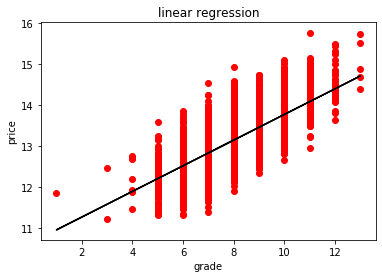

In [114]:
plt.scatter(X_test,y_test, color='r')
plt.title("linear regression")
plt.ylabel("price")
plt.xlabel("grade")
plt.plot(X_test,model.predict(X_test), color='k')
plt.show

In [115]:
## x is the view 

In [116]:
X=house_df["view"].values [:,np.newaxis]
y=house_df["price"].values
y=np.log(y)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.7, random_state=40)
model= LinearRegression()
model.fit(X_train,y_train)
predicted=model.predict(X_test)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, predicted))
Rsquared=metrics.r2_score(y_test,predicted)
a=model.coef_
b=model.intercept_
dict_rest={
   "RMSE": RMSE,
    "Rsquared":Rsquared,
    "coef" : a,
    "intercept":b
}
dict_rest

{'RMSE': 0.49468925945620074,
 'Rsquared': 0.11674989586152262,
 'coef': array([0.24585275]),
 'intercept': 12.987479520126076}

<function matplotlib.pyplot.show(*args, **kw)>

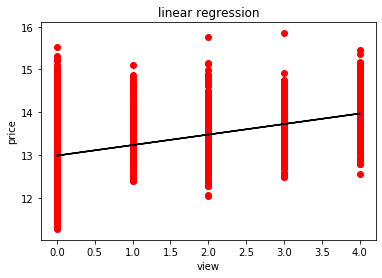

In [117]:
plt.scatter(X_test,y_test, color='r')
plt.title("linear regression")
plt.ylabel("price")
plt.xlabel("view")
plt.plot(X_test,model.predict(X_test), color='k')
plt.show

In [118]:
## x is the numbre of bathrooms
X=house_df["bathrooms"].values [:,np.newaxis]
y=house_df["price"].values
y=np.log(y)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.7, random_state=40)
model= LinearRegression()
model.fit(X_train,y_train)
predicted=model.predict(X_test)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, predicted))
Rsquared=metrics.r2_score(y_test,predicted)
a=model.coef_
b=model.intercept_
dict_rest={
   "RMSE": RMSE,
    "Rsquared":Rsquared,
    "coef" : a,
    "intercept":b
}
dict_rest

{'RMSE': 0.43843343248751715,
 'Rsquared': 0.30621315294326445,
 'coef': array([0.37251515]),
 'intercept': 12.259983814771832}

<function matplotlib.pyplot.show(*args, **kw)>

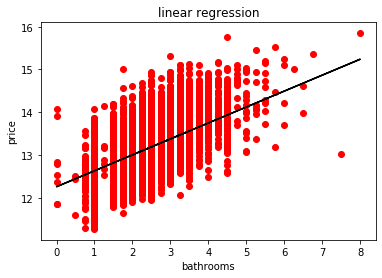

In [119]:
plt.scatter(X_test,y_test, color='r')
plt.title("linear regression")
plt.ylabel("price")
plt.xlabel("bathrooms")
plt.plot(X_test,model.predict(X_test), color='k')
plt.show

# results of the training
for the different feature we trained the linear regression and changed the parameters but the obtained results weren't satisfying and the Rsquared is far from good in thenext section we will try to perform the multi-linear regression and the polynomial one and wewill see if we can improve the performance

# multi-linear regression 

## all the variables are input 

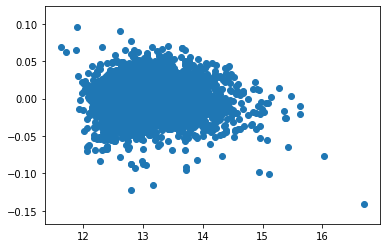

In [120]:
X = house_df.drop(["price"], axis=1)
X_=X.to_numpy()
X_
y=house_df['price']
y_=y.to_numpy()
y_
y_=np.log(y_)
X_train, X_test, Y_train, Y_test = train_test_split(X_,y_, train_size = 0.7, random_state = 42)

model = LinearRegression()
model.fit(X_train, Y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

plt.scatter(y_pred_test, (Y_test - y_pred_test)/Y_test)


In [121]:
RMSE_train = np.sqrt(metrics.mean_squared_error(Y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(Y_test, y_pred_test))
r2_train = metrics.r2_score(Y_train, y_pred_train)
r2_test = metrics.r2_score(Y_test, y_pred_test)

print("RMSE for train: ", RMSE_train)
print("RMSE for test: ", RMSE_test)
print("R2 value for train: ", r2_train)
print("R2 value for test: ", r2_test)

RMSE for train:  0.25537140398691244
RMSE for test:  0.26168543025788676
R2 value for train:  0.7630479742507283
R2 value for test:  0.7574812619710425


# results of the training

for this model all the columns apart the price are used as input to the model
the best obtained values for the obtained model are :
RMSE for train:  0.25537140398691244
RMSE for test:  0.26168543025788676
R2 value for train:  0.7630479742507283
R2 value for test:  0.7574812619710425

## only the preselected important feature are used as input 

In [122]:
house_df=house_df.drop(["sqft_lot","condition",'yr_built','yr_renovated','long'], axis = 1)
house_df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,47.5112
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,47.7210
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,47.7379
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,47.5208
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,47.6168
...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,8,1530,0,47.6993
21609,400000.0,4,2.50,2310,2.0,0,0,8,2310,0,47.5107
21610,402101.0,2,0.75,1020,2.0,0,0,7,1020,0,47.5944
21611,400000.0,3,2.50,1600,2.0,0,0,8,1600,0,47.5345


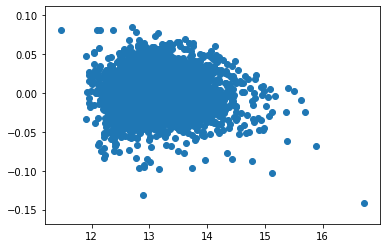

In [123]:
X = house_df.drop(["price"], axis=1)
X_=X.to_numpy()
X_
y=house_df['price']
y_=y.to_numpy()
y_
y_=np.log(y_)
X_train, X_test, Y_train, Y_test = train_test_split(X_,y_, train_size = 0.7, random_state = 42)

model = LinearRegression()
model.fit(X_train, Y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

plt.scatter(y_pred_test, (Y_test - y_pred_test)/Y_test)


In [124]:
RMSE_train = np.sqrt(metrics.mean_squared_error(Y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(Y_test, y_pred_test))
r2_train = metrics.r2_score(Y_train, y_pred_train)
r2_test = metrics.r2_score(Y_test, y_pred_test)

print("RMSE for train: ", RMSE_train)
print("RMSE for test: ", RMSE_test)
print("R2 value for train: ", r2_train)
print("R2 value for test: ", r2_test)

RMSE for train:  0.271918146279843
RMSE for test:  0.2801886419796601
R2 value for train:  0.7313466382469748
R2 value for test:  0.7219728129931036


# results of the training

for this model only the preselected models in the feautre selection section are   are used as input to the model
the best obtained values we got are 
RMSE for train:  0.271918146279843
RMSE for test:  0.2801886419796601
R2 value for train:  0.7313466382469748
R2 value for test:  0.7219728129931036

# polynomial regression 

In [125]:
X = house_df.drop(["price"], axis=1).info()
house_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   floors         21613 non-null  float64
 4   waterfront     21613 non-null  int64  
 5   view           21613 non-null  int64  
 6   grade          21613 non-null  int64  
 7   sqft_above     21613 non-null  int64  
 8   sqft_basement  21613 non-null  int64  
 9   lat            21613 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 1.6 MB


price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
grade            0
sqft_above       0
sqft_basement    0
lat              0
dtype: int64

In [126]:
X = house_df.drop(["price"], axis=1)
X_=X.to_numpy()
X_
y=house_df['price']
y_=y.to_numpy()
y_
y_=np.log(y)
X_train, X_test, Y_train, Y_test = train_test_split(X_,y_, train_size = 0.7, random_state = 42)
polyfeat=PolynomialFeatures(degree=2)
xtrain_poly=polyfeat.fit_transform(X_train)
xtest_poly=polyfeat.fit_transform(X_test)
linear_model=LinearRegression()
poly=linear_model
poly.fit(xtrain_poly,Y_train)
polypred=poly.predict(xtest_poly)


mean_squared_error = metrics.mean_squared_error(Y_test, polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, Y_train), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, Y_test), 3))


Mean Squared Error (MSE)  0.26
R-squared (training)  0.76
R-squared (testing)  0.755


# results of the training

for the used polynomial model of order 3 the best obtained results are :
Mean Squared Error (MSE)  0.26
R-squared (training)  0.76
R-squared (testing)  0.755


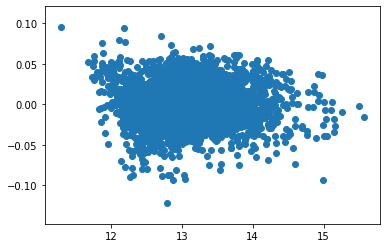

In [127]:
plt.scatter(polypred, (Y_test - polypred)/Y_test)